In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import os

In [2]:
image_path = "../data/raw"

In [4]:
annotations = pd.read_csv("../data/processed/annotations.csv")
labels = pd.read_csv("../data/processed/labels.csv", encoding='unicode_escape')

In [5]:
labels['Abbreviation'] = labels['Abbreviation'].str.strip()

In [6]:
label_map = labels[['Index', 'Abbreviation']].set_index('Index').to_dict()['Abbreviation']

In [7]:
label_map

{1: 'Active',
 2: 'Afraid',
 3: 'Alarmed',
 4: 'Alert',
 5: 'Amazed',
 6: 'Amused',
 7: 'Angry',
 8: 'Calm',
 9: 'Cheerful',
 10: 'Confident',
 11: 'Conscious',
 12: 'Creative',
 13: 'Disturbed',
 14: 'Eager',
 15: 'Educated',
 16: 'Emotional',
 17: 'Empathetic',
 18: 'Fashionable',
 19: 'Feminine',
 20: 'Grateful',
 21: 'Inspired',
 22: 'Jealous',
 23: 'Loving',
 24: 'Manly',
 25: 'Persuaded',
 26: 'Pessimistic',
 27: 'Proud',
 28: 'Sad',
 29: 'Thrifty',
 30: 'Youthful'}

In [8]:
annotations = annotations.set_index("Path")

In [9]:
[label_map[int(label)] for label in annotations.columns]

['Active',
 'Afraid',
 'Alarmed',
 'Alert',
 'Amazed',
 'Amused',
 'Angry',
 'Calm',
 'Cheerful',
 'Confident',
 'Conscious',
 'Creative',
 'Disturbed',
 'Eager',
 'Educated',
 'Emotional',
 'Empathetic',
 'Fashionable',
 'Feminine',
 'Grateful',
 'Inspired',
 'Jealous',
 'Loving',
 'Manly',
 'Persuaded',
 'Pessimistic',
 'Proud',
 'Sad',
 'Thrifty',
 'Youthful']

In [10]:
annotations.columns = ['Active',
                        'Afraid',
                        'Alarmed',
                        'Alert',
                        'Amazed',
                        'Amused',
                        'Angry',
                        'Calm',
                        'Cheerful',
                        'Confident',
                        'Conscious',
                        'Creative',
                        'Disturbed',
                        'Eager',
                        'Educated',
                        'Emotional',
                        'Empathetic',
                        'Fashionable',
                        'Feminine',
                        'Grateful',
                        'Inspired',
                        'Jealous',
                        'Loving',
                        'Manly',
                        'Persuaded',
                        'Pessimistic',
                        'Proud',
                        'Sad',
                        'Thrifty',
                        'Youthful']

In [11]:
annotations.sum(axis=1).value_counts()

3.0     7420
4.0     6804
5.0     5743
6.0     3990
7.0     2418
8.0     1528
9.0      875
10.0     591
11.0     290
12.0     165
13.0     135
14.0     119
15.0     102
16.0      75
17.0      53
18.0      19
19.0       5
20.0       4
21.0       2
23.0       1
22.0       1
dtype: int64

In [12]:
annotations.sum(axis=1)[annotations.sum(axis=1)==23]

Path
0/49380.jpg    23.0
dtype: float64

In [13]:
annotations

,Active,Afraid,Alarmed,Alert,Amazed,Amused,Angry,Calm,Cheerful,Confident,...,Inspired,Jealous,Loving,Manly,Persuaded,Pessimistic,Proud,Sad,Thrifty,Youthful
Path,,,,,,,,,,,,,,,,,,,,,
10/170741.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/80990.jpg,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
0/27000.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/10211.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2/97682.jpg,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/175453.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/108280.jpg,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/128060.jpg,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
annotations.sample(5)

,Active,Afraid,Alarmed,Alert,Amazed,Amused,Angry,Calm,Cheerful,Confident,...,Inspired,Jealous,Loving,Manly,Persuaded,Pessimistic,Proud,Sad,Thrifty,Youthful
Path,,,,,,,,,,,,,,,,,,,,,
2/163732.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10/177846.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0/117140.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2/33692.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/105620.jpg,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
image_path

'../data/raw'

C:\Users\ro_chopr\AppData\Local\Temp\ipykernel_3632\3333531366.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


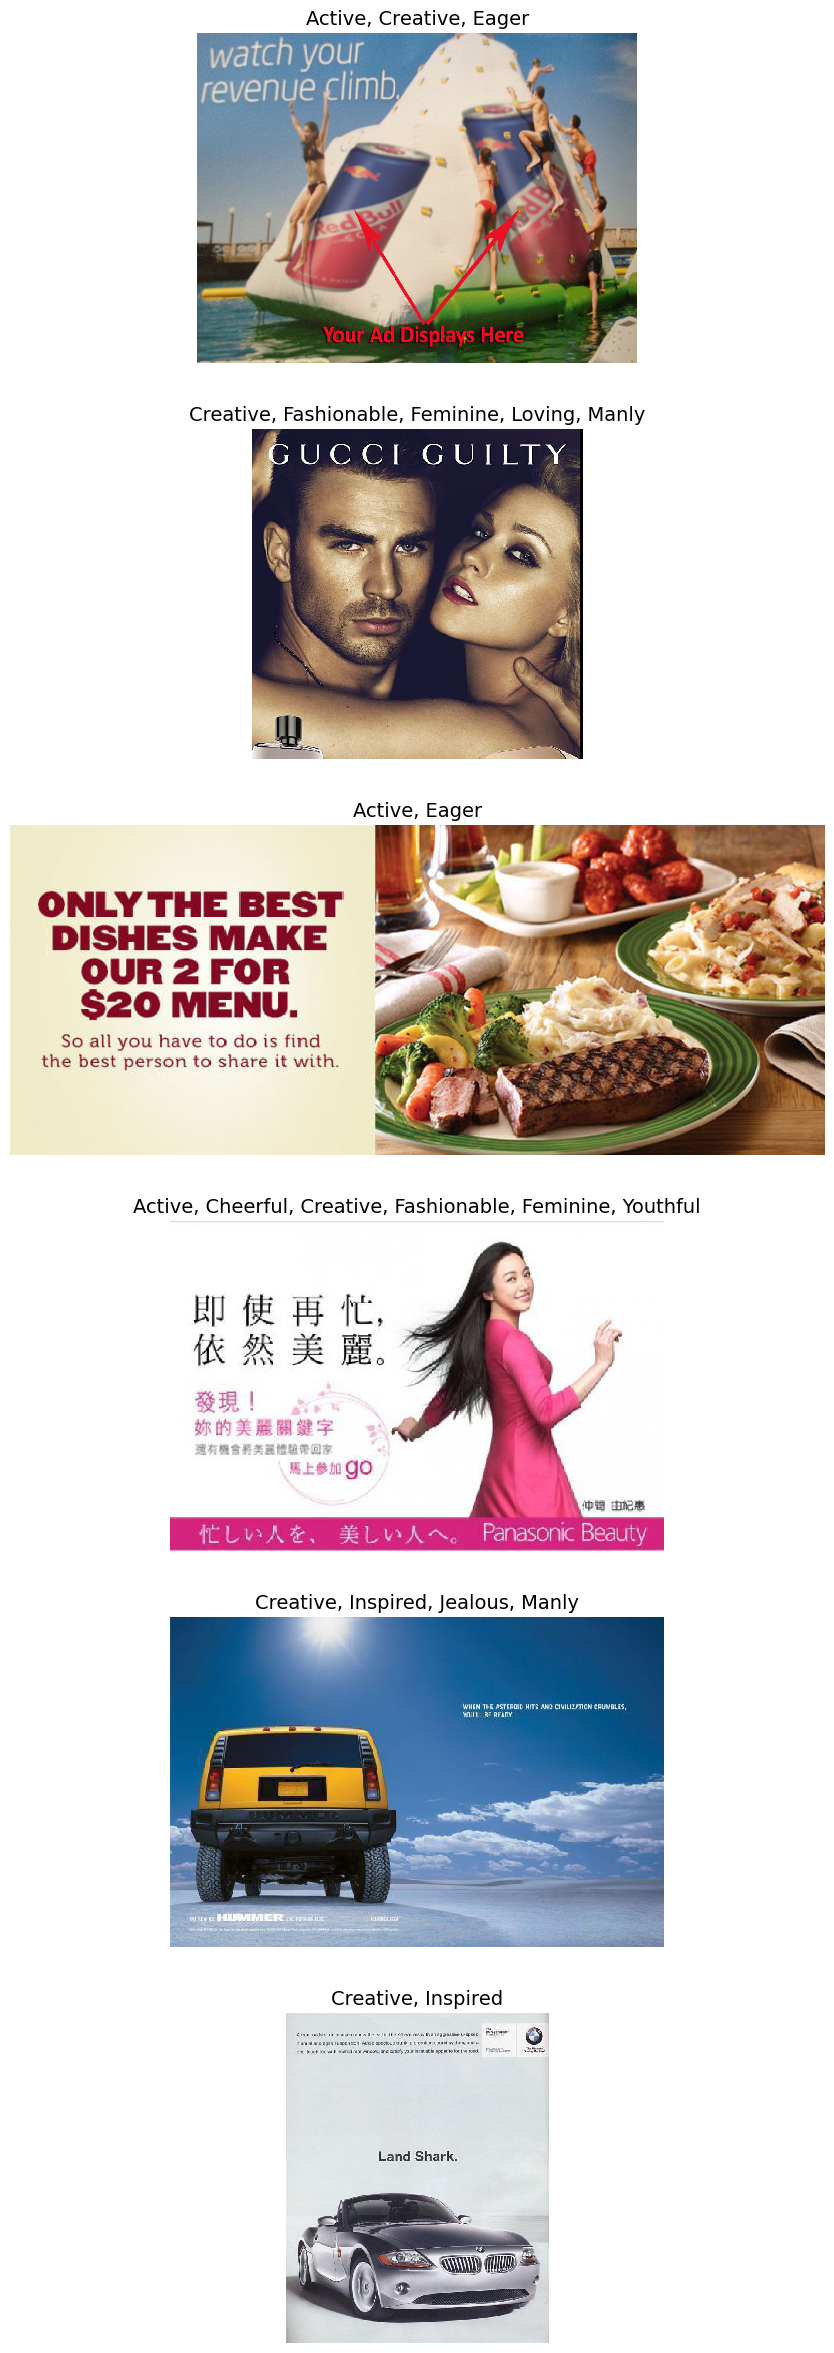

In [16]:
fig = plt.figure(figsize=(50,30))

for i, (path, label) in enumerate(annotations.sample(6).iterrows()):
    img = Image.open(os.path.join(image_path, path))
    plt.subplot(6,1, i+1, frameon=False)

    plt.imshow(img, cmap = 'gray', interpolation='nearest')
    plt.title(", ".join(label[label!=0].index), fontsize = 14)
    plt.axis('off')
fig.show()

In [17]:
annotations = annotations[annotations>1].dropna(how='all')

In [18]:
annotations.to_csv("../data/processed/reduced_annotations.csv")

C:\Users\ro_chopr\AppData\Local\Temp\ipykernel_3632\2218334481.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


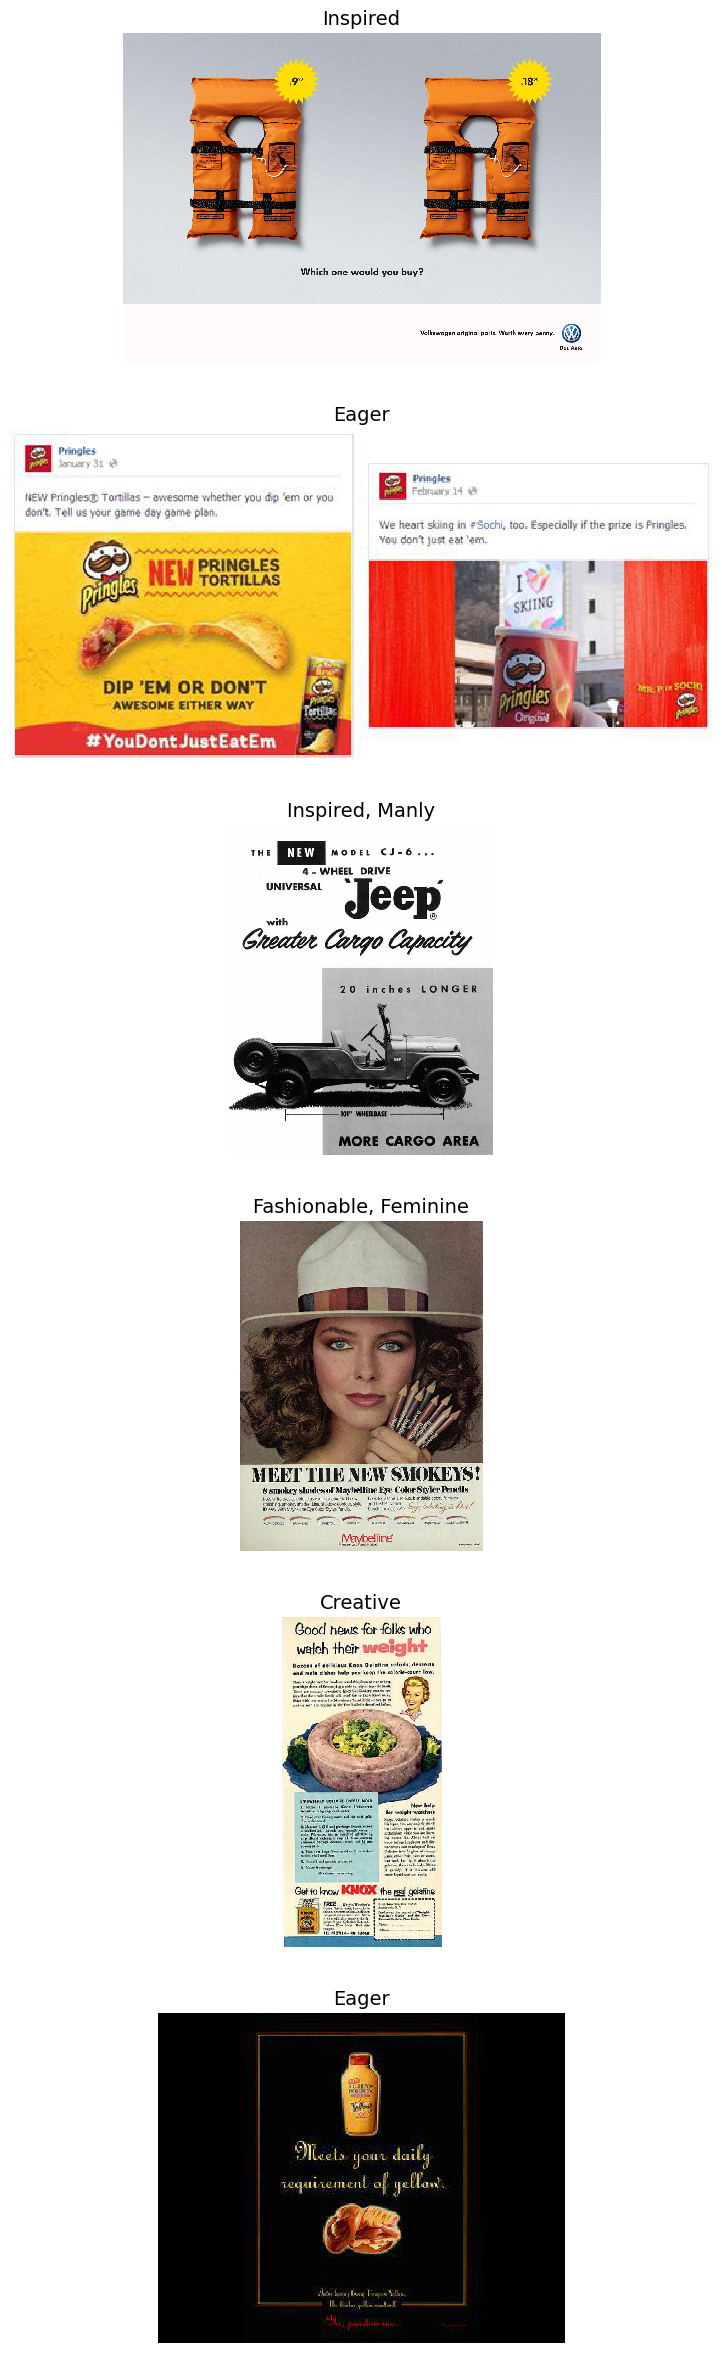

In [19]:
fig = plt.figure(figsize=(50,30))

for i, (path, label) in enumerate(annotations.sample(6).iterrows()):
    label = label.fillna(0)
    img = Image.open(os.path.join(image_path, path))
    plt.subplot(6,1, i+1, frameon=False)

    plt.imshow(img, cmap = 'gray', interpolation='nearest')
    plt.title(", ".join(label[label!=0].index), fontsize = 14)
    plt.axis('off')
fig.show()

In [26]:
annotations.count().sort_values()

Jealous           1
Pessimistic       4
Grateful          9
Sad              12
Angry            13
Proud            25
Afraid           64
Empathetic       69
Disturbed        80
Loving          112
Amazed          119
Emotional       128
Alarmed         137
Calm            201
Youthful        282
Thrifty         301
Amused          357
Conscious       378
Persuaded       382
Cheerful        456
Confident       593
Manly           608
Educated        892
Inspired       1067
Alert          1248
Active         2502
Feminine       2519
Creative       3950
Fashionable    4078
Eager          4769
dtype: int64

In [27]:
annotations.count().sort_values().index

Index(['Jealous', 'Pessimistic', 'Grateful', 'Sad', 'Angry', 'Proud', 'Afraid',
       'Empathetic', 'Disturbed', 'Loving', 'Amazed', 'Emotional', 'Alarmed',
       'Calm', 'Youthful', 'Thrifty', 'Amused', 'Conscious', 'Persuaded',
       'Cheerful', 'Confident', 'Manly', 'Educated', 'Inspired', 'Alert',
       'Active', 'Feminine', 'Creative', 'Fashionable', 'Eager'],
      dtype='object')

In [28]:
remove_labels = ['Jealous', 'Pessimistic', 'Grateful', 'Sad', 'Angry', 'Proud', 'Afraid',
       'Empathetic', 'Disturbed']

In [38]:
annotations.shape[0] - annotations.drop(remove_labels, axis=1).dropna(how='all').shape[0]

108

In [44]:
annotations = annotations[~annotations[remove_labels].any(axis=1)].drop(remove_labels, axis=1)

In [48]:
annotations.count().sort_values()

Alarmed          94
Loving          110
Emotional       111
Amazed          118
Calm            200
Youthful        282
Thrifty         301
Amused          355
Conscious       369
Persuaded       379
Cheerful        454
Confident       586
Manly           607
Educated        876
Inspired       1058
Alert          1216
Active         2491
Feminine       2518
Creative       3930
Fashionable    4074
Eager          4759
dtype: int64

In [49]:
remove_labels = ['Alarmed']
annotations = annotations[~annotations[remove_labels].any(axis=1)].drop(remove_labels, axis=1)

In [50]:
annotations.count().sort_values()

Emotional       110
Loving          110
Amazed          118
Calm            200
Youthful        282
Thrifty         301
Amused          355
Conscious       363
Persuaded       379
Cheerful        454
Confident       586
Manly           607
Educated        867
Inspired       1056
Alert          1192
Active         2489
Feminine       2518
Creative       3928
Fashionable    4074
Eager          4759
dtype: int64

In [51]:
annotations.to_csv("../data/processed/reduced_annotations.csv")